In [1]:
import numpy as np
import pandas as pd
import PIL
from PIL import Image
import glob
import random
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 12)

# Generando imagenes de cesped

Se obtuvieron 15 hojas de cada imagen de cesped con el fin de generar de forma aleatoria imagenes para poder entrenar la red neuronal. De fondo se utilizará una textura de tierra. A continuación las imagenes originales.

Text(0.5, 1.0, 'Tierra')

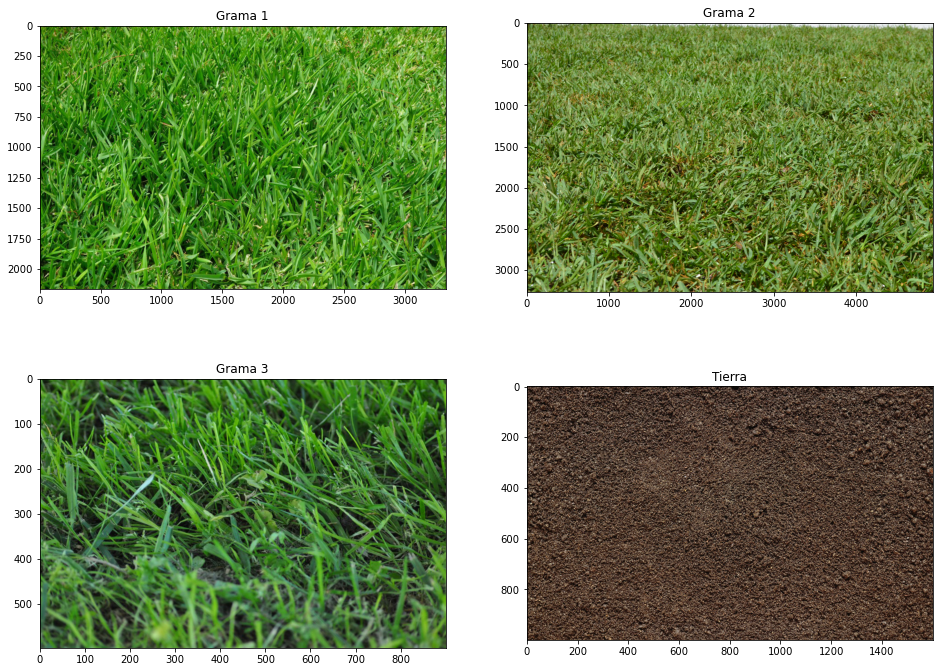

In [2]:
f, axarr = plt.subplots(2,2)

grama = Image.open("imagenes-originales/grama-1.jpg")
axarr[0,0].imshow(grama)
axarr[0,0].set_title('Grama 1')

grama = Image.open("imagenes-originales/grama-2.jpg")
axarr[0,1].imshow(grama)
axarr[0,1].set_title('Grama 2')

grama = Image.open("imagenes-originales/grama-3.jpg")
axarr[1,0].imshow(grama)
axarr[1,0].set_title('Grama 3')

grama = Image.open("imagenes-originales/tierra.jpg")
axarr[1,1].imshow(grama)
axarr[1,1].set_title('Tierra')

Se cargarán todas los nombres de imagenes de plantilla disponibles a la variable <i>files</i> y se creará un vector con la cantidad de hojas por cada imagen.

In [3]:
files = glob.glob("imagenes-plantilla/*")
quantity = []
for path in files:
    q = path.split("-")
    q = q[-1].split(".")
    quantity.append(int(q[0]))

De estas imagenes se extrajeron la siguientes 45 hojas:

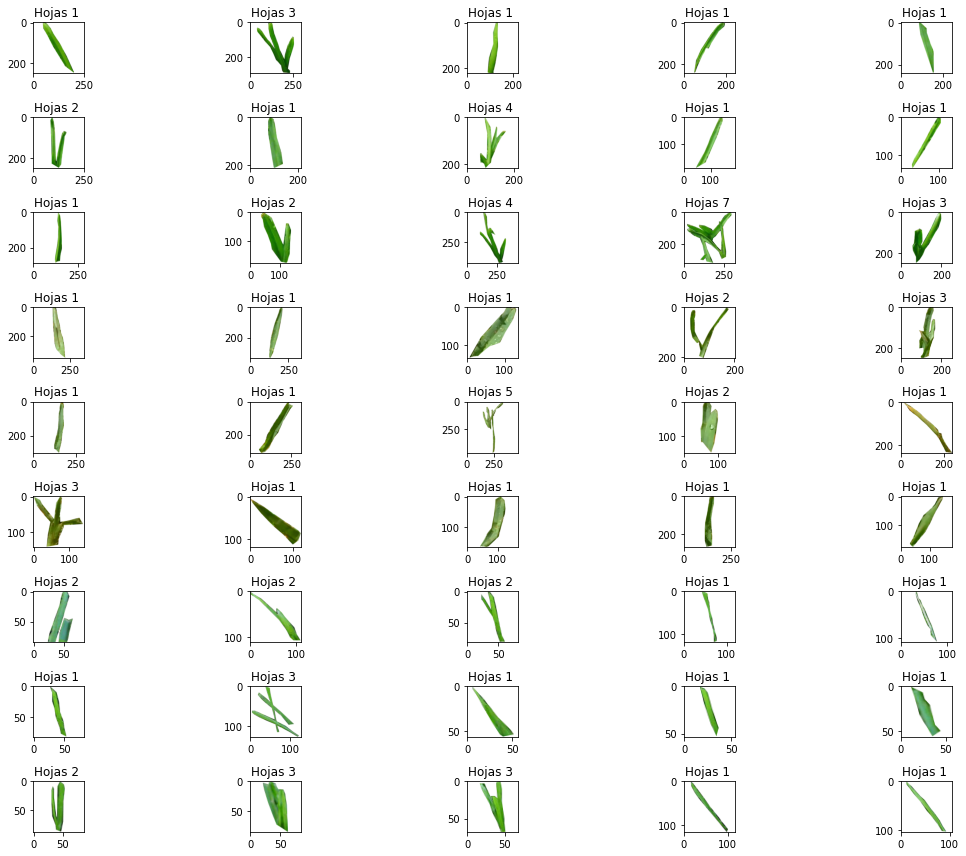

In [4]:
f, axarr = plt.subplots(9,5)
for i in range(0, 9):
    for j in range(0, 5):
        index = i*5 + j
        img = Image.open(files[index])
        axarr[i,j].imshow(img)
        axarr[i,j].set_title('Hojas '+str(quantity[index])+" ")
f.tight_layout()

La siguiente función busca mostrar las diferentes hojas de forma aleatoria:

In [5]:
def generar_cesped(vi, vf):
    #Fondo de tierra
    image = Image.open("imagenes-originales/tierra-final.jpg")
    
    m = random.randint(1, 6)
    
    #Cargando plantillas
    images = []
    for path in files:
        img = Image.open(path)
        img.thumbnail((int(120/m),int(120/m)), Image.LANCZOS)
        images.append(img)

    hojas = 0
    max_files = len(files)

    for i in range(0, 6*(m+2)):
        for j in range(0, 6*(m+2)):
            v1 = random.randint(vi, vf)
            p1 = random.randint(0, 100)
            #Probabilidad de mostrar hoja
            if( p1 < v1):
            
                index = random.randint(0, max_files) -1
                img = images[index]

                #Rotar
                r = random.randint(0, 60)
                d = random.randint(-1, 1)
                img = img.rotate(r*d, PIL.Image.NEAREST, expand = 1)

                hojas = hojas + quantity[index]
                image.paste(img, (i*int(120/(m+4))-int(120/(m+4)), j*int(120/(m+4))-int(120/(m+4))), img)
    
    return image, hojas

Generando imagenes de prueba:

Probabilidad de mostrar la hoja menor de 1 a 5:

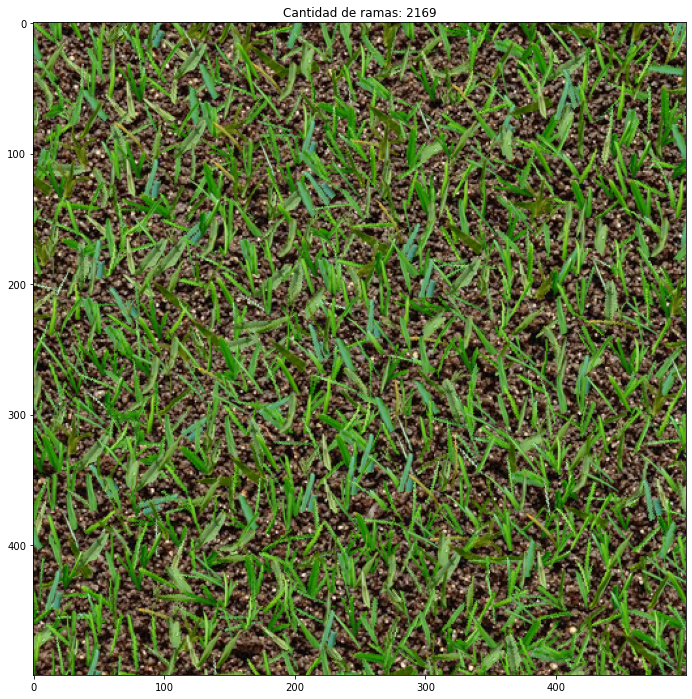

In [6]:
imagen_prueba, hojas = generar_cesped(90, 95)
plt.title("Cantidad de ramas: "+str(hojas))
plt.imshow(imagen_prueba)
imagen_prueba.save( '02-dataset/grama-prueba-1-5.jpg', "JPEG",quality=100, optimize=True, progressive=True)

Generando dataset de 1800 imagenes:

In [7]:
csv = pd.DataFrame([])
vi = random.randint(90, 95)
vf = random.randint(90, 95)
for i in range(0, 1800):
    imagen_prueba, hojas = generar_cesped(vi, vi+vf)
    name = 'imagen-'+str(i)+'.jpg'
    imagen_prueba.save( '02-dataset/cesped/' + name , "JPEG", quality=100, optimize=True, progressive=True)
    csv = pd.concat([csv, pd.DataFrame([{"file": name, "hojas": hojas}])])
    if( i % 2 == 0):
        vi = random.randint(90, 95)
        vf = random.randint(90, 95)
csv.to_csv("02-dataset/cesped.csv")

Mostrando información del dataframe guardado:

In [8]:
csv

,file,hojas
0,imagen-0.jpg,2360
0,imagen-1.jpg,1653
0,imagen-2.jpg,2312
0,imagen-3.jpg,2329
0,imagen-4.jpg,2412
...,...,...
0,imagen-1795.jpg,572
0,imagen-1796.jpg,2343
0,imagen-1797.jpg,3170
0,imagen-1798.jpg,584


In [9]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    1800 non-null   object
 1   hojas   1800 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 42.2+ KB
